In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('android.csv')

In [5]:
data

,name,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles,malware
0,ping,0.000,5.000,0.000,10.0,1.030,164.64,146.36,0.61,2.72,58266.0,26.43,85861,111.667,19973.0,2060667,0
1,curl,0.014,5.000,0.601,14.0,0.072,317.32,255.84,18.07,0.18,135878.0,7.95,75561,86.263,13152.0,2119754,0
2,top,0.005,0.219,0.060,6.0,0.071,247.85,266.19,11.33,0.24,104448.0,3.49,54497,106.584,4657.0,1781822,0
3,unzip,0.001,0.717,0.000,16.0,0.012,2346.59,2664.54,79.12,0.34,93458.0,14.89,97912,73.217,7863.0,2349887,0
4,system-monitor,0.182,11.000,0.181,4.0,1.527,60.68,48.13,0.88,0.69,289124.0,2.14,87246,23.621,19071.0,2140178,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,41089,0.337,1.000,0.000,49.0,1.054,149.29,125.43,1.00,1.50,100617.0,11.06,95818,123.367,15136.0,2299597,1
66,41375,0.038,0.204,0.020,18.0,1.496,61.99,47.42,1.04,0.60,321071.0,3.94,95535,31.285,13880.0,2356069,1
67,42485,0.001,0.781,0.000,40.0,0.314,381.38,314.04,3.05,1.25,93834.0,13.17,94456,119.862,12337.0,2266964,1
68,43552,0.630,0.000,0.000,44.0,0.165,803.32,664.66,6.28,1.28,102347.0,12.31,93360,108.567,13169.0,2240652,1


In [6]:
data.shape

(70, 17)

In [7]:
data=data.sample(frac=1).reset_index(drop=True)  #reset the index value

In [8]:
data.head()

,name,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles,malware
0,autoupdate,0.342,0.477,0.027,11.0,1.038,69.52,56.13,1.10,0.63,236994.0,6.15,98792,33.237,12826.0,2370923,0
1,41089,0.337,1.000,0.000,49.0,1.054,149.29,125.43,1.00,1.50,100617.0,11.06,95818,123.367,15136.0,2299597,1
2,python,0.005,0.279,0.105,30.0,0.038,493.37,666.52,24.81,0.27,138305.0,10.24,82026,77.701,13754.0,2352067,0
3,git-pull,0.135,2.000,0.146,54.0,0.545,73.32,65.54,1.66,0.44,165361.0,3.35,73730,45.044,11337.0,1989286,0
4,ping,0.000,5.000,0.000,10.0,1.030,164.64,146.36,0.61,2.72,58266.0,26.43,85861,111.667,19973.0,2060667,0


In [9]:
import seaborn as sns

<AxesSubplot:xlabel='malware', ylabel='count'>

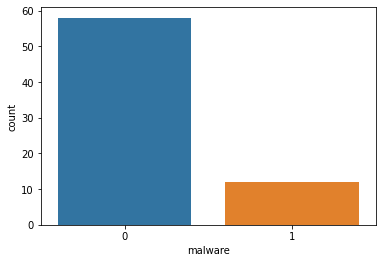

In [10]:
sns.countplot(x='malware',data=data)

In [11]:
target_count=data.malware.value_counts()  #counting the data in malware
print('Class 0:',target_count[0])         #class 0 >> class 1
print('Class 1:',target_count[1])

Class 0: 58
Class 1: 12


In [12]:
count_class_0,count_class_1=data.malware.value_counts()    #duplication of class 0 to nearest of class 0  
                                                           #class 0 ~= class 1

In [13]:
df_class_0= data[data['malware']==0]
df_class_1= data[data['malware']==1]

In [14]:
df_class_1_over = df_class_1.sample(count_class_0,replace=True) #equaling the class 1 to class 0
df_test_over = pd.concat([df_class_0,df_class_1_over],axis=0)   #combining class 0 and class 1

In [15]:
df_test_over.shape

(116, 17)

<AxesSubplot:xlabel='malware', ylabel='count'>

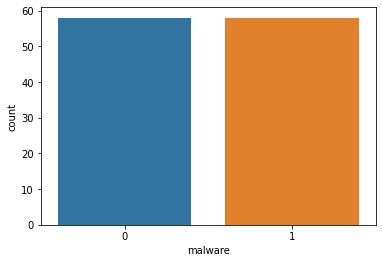

In [16]:
sns.countplot(x='malware',data=df_test_over)

In [17]:
X=df_test_over.iloc[:,df_test_over.columns!='malware']  #independent value
Y=df_test_over.iloc[:,df_test_over.columns=='malware']  #dependent value

In [18]:
X.head()

,name,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles
0,autoupdate,0.342,0.477,0.027,11.0,1.038,69.52,56.13,1.10,0.63,236994.0,6.15,98792,33.237,12826.0,2370923
2,python,0.005,0.279,0.105,30.0,0.038,493.37,666.52,24.81,0.27,138305.0,10.24,82026,77.701,13754.0,2352067
3,git-pull,0.135,2.000,0.146,54.0,0.545,73.32,65.54,1.66,0.44,165361.0,3.35,73730,45.044,11337.0,1989286
4,ping,0.000,5.000,0.000,10.0,1.030,164.64,146.36,0.61,2.72,58266.0,26.43,85861,111.667,19973.0,2060667
5,zsh,0.050,0.574,0.185,26.0,0.423,30.83,19.64,0.71,0.43,161921.0,1.11,42612,21.307,3492.0,1304750


In [19]:
Y.head()

,malware
0,0
2,0
3,0
4,0
5,0


In [20]:
from sklearn.utils import shuffle #shuffling the order

In [21]:
X,Y=shuffle(X,Y)

In [22]:
X.head()

,name,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles
54,13915,0.577,0.000,0.000,48.0,0.343,384.13,314.11,3.17,1.21,108002.0,12.93,93825,89.487,14077.0,2251821
30,perf,0.190,4.000,0.137,14.0,0.693,74.91,65.85,1.49,0.50,241903.0,2.89,65722,54.560,13870.0,1699014
16,thunderbird,0.249,2.000,0.120,8.0,0.974,57.66,47.53,0.75,0.77,171234.0,3.89,70828,32.050,13142.0,1785454
46,vmstat,0.155,1.000,0.000,39.0,0.436,325.86,265.52,3.35,0.97,146691.0,9.37,96717,110.886,13453.0,2321192
63,41375,0.038,0.204,0.020,18.0,1.496,61.99,47.42,1.04,0.60,321071.0,3.94,95535,31.285,13880.0,2356069


In [23]:
X=X.drop(columns='name') #deleting the name column

In [24]:
X.head()

,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles
54,0.577,0.000,0.000,48.0,0.343,384.13,314.11,3.17,1.21,108002.0,12.93,93825,89.487,14077.0,2251821
30,0.190,4.000,0.137,14.0,0.693,74.91,65.85,1.49,0.50,241903.0,2.89,65722,54.560,13870.0,1699014
16,0.249,2.000,0.120,8.0,0.974,57.66,47.53,0.75,0.77,171234.0,3.89,70828,32.050,13142.0,1785454
46,0.155,1.000,0.000,39.0,0.436,325.86,265.52,3.35,0.97,146691.0,9.37,96717,110.886,13453.0,2321192
63,0.038,0.204,0.020,18.0,1.496,61.99,47.42,1.04,0.60,321071.0,3.94,95535,31.285,13880.0,2356069


In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [26]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [27]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
featureScores.nlargest(10,'Score')  

,Specs,Score
9,branches,1.127518e+06
14,ref-cycles,2.557477e+05
6,stalled-cycles-backend-percent,1.309743e+05
5,stalled-cycles-frontend-percent,4.460973e+04
11,bus-cycle,4.141911e+04
13,cache-references,7.929852e+03
7,Instructions-per-cycle,2.839080e+03
12,cache-misses-percent,3.770720e+02
10,branch-misses-percent,9.839918e+01
3,page-faults,7.784930e+01


C:\Users\sasik\anaconda3\envs\new\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[0.09443107 0.04249106 0.03962748 0.04332675 0.04038373 0.03336628
 0.03075378 0.02881294 0.19360881 0.10338862 0.1191991  0.06177128
 0.07406    0.0420073  0.0527718 ]


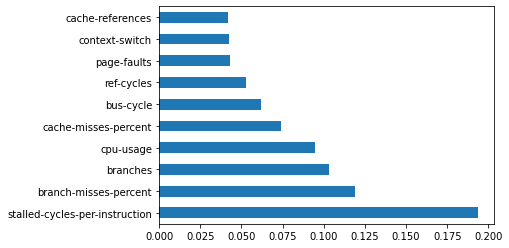

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [30]:
X_train.shape

(92, 15)

In [31]:
X_train.head()

,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles
12,0.179,3.000,0.385,18.0,0.610,41.89,34.70,1.01,0.42,182.384,2.47,55528,34.303,12954.0,1563441
69,0.006,4.000,1.000,33.0,0.220,674.02,575.80,4.30,1.57,92447.000,12.52,92443,117.436,13463.0,2218637
44,0.001,1.000,0.000,46.0,1.008,131.60,105.05,1.35,0.97,137904.000,10.46,96398,101.263,14631.0,2313557
2,0.005,0.279,0.105,30.0,0.038,493.37,666.52,24.81,0.27,138305.000,10.24,82026,77.701,13754.0,2352067
58,0.150,2.000,0.203,5.0,1.064,54.40,41.71,0.90,0.60,218635.000,3.01,79690,26.154,14192.0,1984391


In [32]:
Y_train.head()

,malware
12,0
69,1
44,0
2,0
58,0


In [33]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# DecisionTreeClassifer

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
tree= DecisionTreeClassifier()

In [36]:
tree.fit(X_train,Y_train)  #train

DecisionTreeClassifier()

In [37]:
y_pred=tree.predict(X_test)  #predict the output
y_pred

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0], dtype=int64)

In [38]:
model2=metrics.accuracy_score(Y_test,y_pred)
print(model2)

0.9583333333333334


In [39]:
cnf_matrix = confusion_matrix(Y_test,y_pred)

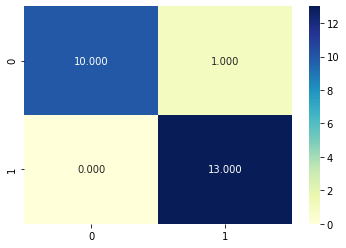

In [42]:
labels = [0,1]
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()